<a href="https://colab.research.google.com/github/Fadelmuhammad013/Machine-learning/blob/main/05.%20Week%205/Netflix_Titles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [2]:
# Import pustaka yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset Netflix
df = pd.read_csv('netflix_titles.csv')

# Menampilkan 5 baris pertama
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Melihat info data
df.info()

# Menghapus baris dengan data kosong di kolom penting
df = df.dropna(subset=['title', 'type', 'country', 'release_year'])

# Mengisi missing value kolom rating dengan modus (cara aman tanpa warning)
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Membersihkan spasi di kolom date_added sebelum mengubahnya ke datetime
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Membuat kolom baru: tahun saat ditambahkan ke Netflix
df['year_added'] = df['date_added'].dt.year

# Membuat kolom baru: jumlah pemeran yang disebutkan
df['num_cast'] = df['cast'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)

# Tampilkan hasil akhir dari data yang sudah diperbarui
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<ipython-input-3-2ebba397dd89>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
<ipython-input-3-2ebba397dd89>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_added'] = df['date_added'].str.strip()
<ipython-input-3-2ebba397dd89>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,num_cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,19
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,8
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,8
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021.0,4


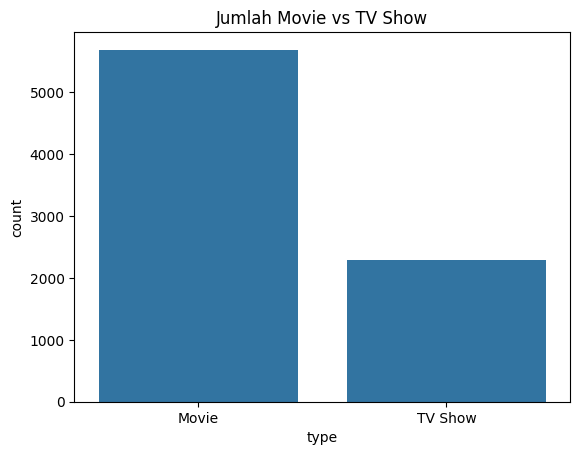

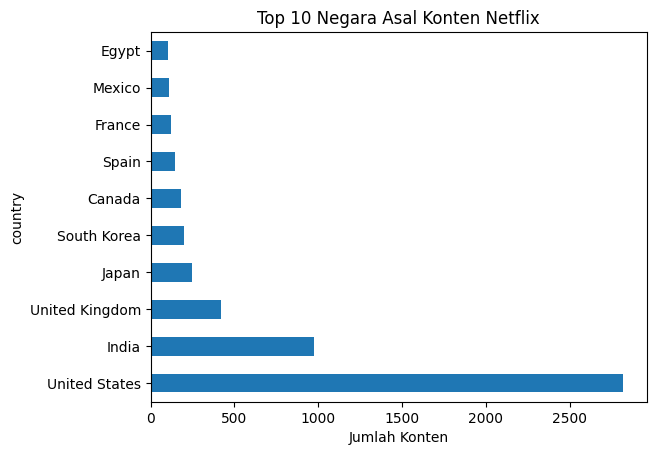

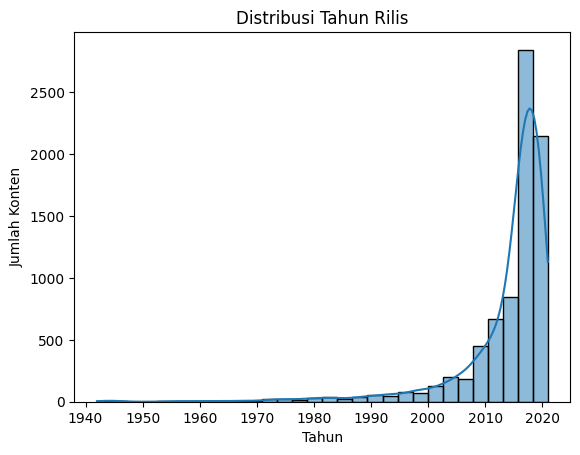

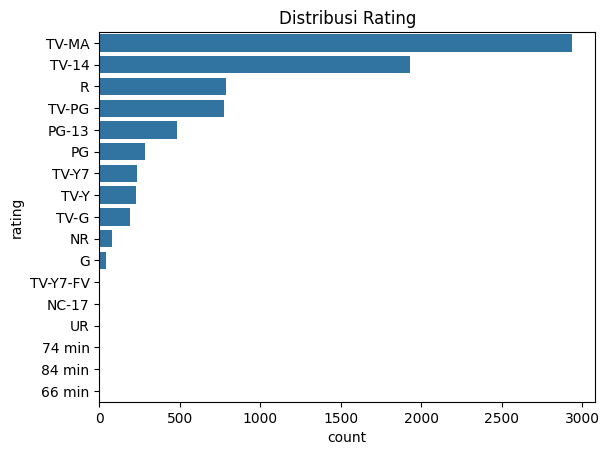

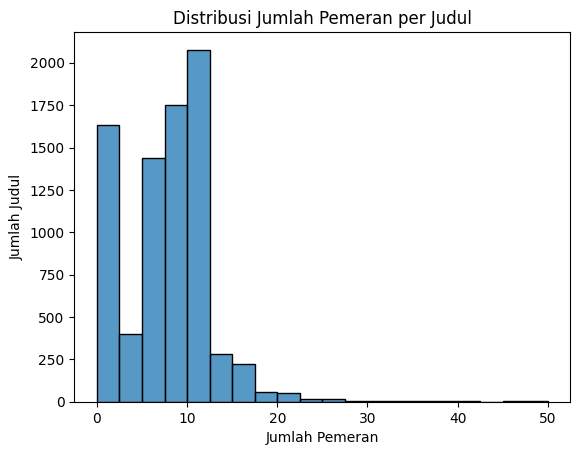

In [4]:

# Visualisasi jumlah film vs TV Show
sns.countplot(data=df, x='type')
plt.title('Jumlah Movie vs TV Show')
plt.show()

# Jumlah konten berdasarkan negara (top 10)
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh')
plt.title('Top 10 Negara Asal Konten Netflix')
plt.xlabel('Jumlah Konten')
plt.show()

# Distribusi tahun rilis
sns.histplot(df['release_year'], bins=30, kde=True)
plt.title('Distribusi Tahun Rilis')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Konten')
plt.show()

# Rating terbanyak
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Distribusi Rating')
plt.show()

# Jumlah pemeran per judul (num_cast)
sns.histplot(df['num_cast'], bins=20)
plt.title('Distribusi Jumlah Pemeran per Judul')
plt.xlabel('Jumlah Pemeran')
plt.ylabel('Jumlah Judul')
plt.show()

**Penjelasan Matematis Terkait EDA**

**Distribusi Frekuensi**

Distribusi frekuensi menghitung jumlah kemunculan dari suatu nilai kategori atau numerik. Tidak menggunakan rumus matematis eksplisit, tapi secara konseptual:

***Frekuensi = Jumlah Kemunculan Setiap Nilai***

**Modus**
Nilai yang paling sering muncul dari sebuah kolom. Jika suatu kolom memiliki data:

image.png

**Histogram**

Menunjukkan penyebaran nilai numerik dengan membagi ke dalam rentang (bins).
Tinggi batang menunjukkan jumlah data dalam tiap rentang.

**KDE (Kernel Density Estimation)**

Estimasi distribusi probabilitas dari data numerik secara smooth:

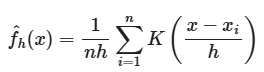

Dimana :

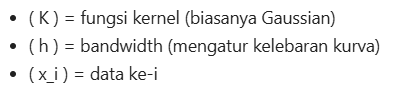

**Value Counts**

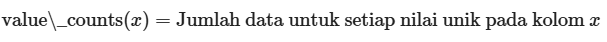

Digunakan untuk visualisasi seperti bar chart.